# First notebook dedicated to do basic checks on the referum results :

* Did I get the proper charset is used for the town names ? 
* Any missing values ? Duplicate ?
* Overall results over all votes, without more interesting insight

In [1]:
from data_reader.data_reader import DataReader
from data_reader.helpers import locations

In [2]:
results = DataReader(
    path=locations("referendum"),
    insee_code=('Code du département','Code de la commune'),
    drop_domtom=False
).content()
total = len(results)
print(total)

36791


In [3]:
results.head()

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
insee,,,,,,,,,
01001,01,AIN,001,L'Abergement-Clémenciat,592,84,9,154,345
01002,01,AIN,002,L'Abergement-de-Varey,215,36,5,66,108
01004,01,AIN,004,Ambérieu-en-Bugey,8205,1698,126,2717,3664
01005,01,AIN,005,Ambérieux-en-Dombes,1152,170,18,280,684
01006,01,AIN,006,Ambléon,105,17,1,35,52


In [4]:
results.describe()

,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
count,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.251082e+03,256.697100,19.058737,426.723383,548.602348
std,8.595773e+03,2075.420552,96.750220,3303.009008,3346.575020
min,6.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.600000e+02,23.000000,2.000000,49.000000,81.000000
50%,3.370000e+02,49.000000,6.000000,108.000000,169.000000
75%,8.070000e+02,120.000000,14.000000,268.000000,402.000000
max,1.253322e+06,248755.000000,12093.000000,506594.000000,485880.000000


Good thing first : the choice of charset (utf-8) is the right one, same for the delimiter.

We are dealing with 36791 different towns, and it seems on average they mostly chose 'B' (median at 169). It doesn't mean yet this proposition won, we will see that further down.

At a first glance it also seems abstention was around 25%. We will also confirm that later.

In [5]:
results.isnull().sum()

Code du département       0
Libellé du département    0
Code de la commune        0
Libellé de la commune     0
Inscrits                  0
Abstentions               0
Blancs et nuls            0
Choix A                   0
Choix B                   0
dtype: int64

Also good : there are no missing values, no cleaning needed on that side

## Now check check for duplicates and understand them

Remember : as this covers differement departements, it is normal to find duplicates in the most common town names

In [6]:
results.columns

Index(['Code du département', 'Libellé du département', 'Code de la commune',
       'Libellé de la commune', 'Inscrits', 'Abstentions', 'Blancs et nuls',
       'Choix A', 'Choix B'],
      dtype='object')

In [7]:
tmp_libel = results['Libellé de la commune'].value_counts()
dupli_libel = sum([(id>1)*id for id in tmp_libel])
print(f"{dupli_libel} towns have duplicated names, {100*dupli_libel/total}% of the total ({total} towns)")

4170 towns have duplicated names, 11.334293713136365% of the total (36791 towns)


In [8]:
tmp_code = results['Code de la commune'].value_counts()
dupli_code = sum([(id>1)*id for id in tmp_code])
print(f"{dupli_code} towns have duplicated codes, {100*dupli_code/total}% of the total ({total} towns)")

36719 towns have duplicated codes, 99.80429996466528% of the total (36791 towns)


### The code duplication probably correspond to a re-use of codes in each departement. Let's check this

Out of curiosity I'll perform the same check by town names

In [9]:
dept_codes = results['Code du département'].unique()
print(dept_codes)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '2A' '2B' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' 'ZA' 'ZB'
 'ZC' 'ZD' 'ZM' 'ZN' 'ZP' 'ZS' 'ZW' 'ZX' 'ZZ']


In [10]:
def check_duplication_by_dept(duptype):
    for dept in dept_codes:
        dept_towns = (results[f"Code du département"] == dept)
        dept_counts = results[dept_towns][f"{duptype} de la commune"].value_counts()
    
        if any([c>1 for c in dept_counts]):
            print(f"Departement {dept} still has {duptype} duplicates")
            break
    else:
        print(f"No {duptype} duplicates found once split by dept")
        
check_duplication_by_dept("Code")
check_duplication_by_dept("Libellé")

No Code duplicates found once split by dept
No Libellé duplicates found once split by dept


In [11]:
results[(results['Code du département'].str.contains('Z'))]

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B
insee,,,,,,,,,
ZA101,ZA,GUADELOUPE,101,Les Abymes,34547,15393,1603,12100,5451
ZA102,ZA,GUADELOUPE,102,Anse-Bertrand,4832,2890,93,1225,624
ZA103,ZA,GUADELOUPE,103,Baie-Mahault,19599,7881,825,6849,4044
ZA104,ZA,GUADELOUPE,104,Baillif,4733,1977,224,1513,1019
ZA105,ZA,GUADELOUPE,105,Basse-Terre,9142,3937,456,2847,1902
...,...,...,...,...,...,...,...,...,...
ZZ007,ZZ,FRANCAIS DE L'ETRANGER,007,Europe centrale,89643,54981,318,17055,17289
ZZ008,ZZ,FRANCAIS DE L'ETRANGER,008,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
ZZ009,ZZ,FRANCAIS DE L'ETRANGER,009,Afrique Nord-Ouest,98997,59887,321,22116,16673


### Conclusion #1 : we can combine departemental codes & either town code or name to get a unique ID

To keep in mind when I'll match with other databases

# Now let's get into the scores

* First the obvious one : which proposition won at the national level, how much abstention there was
* Second : Distribution of % for each proposition per town, then correlation with number of voters in each town

Will refine this later notebooks

In [12]:
national=results[ ["Inscrits","Abstentions","Blancs et nuls","Choix A","Choix B"] ].sum()
print(national)

Inscrits          46028542
Abstentions        9444143
Blancs et nuls      701190
Choix A           15699580
Choix B           20183629
dtype: int64


We can already see that B won, let's make it clearer.

In [13]:
national["Abstention Officielle"] = national["Abstentions"]+national["Blancs et nuls"]
national = 100*national/national["Inscrits"]

In [14]:
national

Inscrits                 100.000000
Abstentions               20.518015
Blancs et nuls             1.523381
Choix A                   34.108358
Choix B                   43.850246
Abstention Officielle     22.041396
dtype: float64

[Text(0, 0.5, '% of registered voters'),
 Text(0.5, 0, 'Official voting categories')]

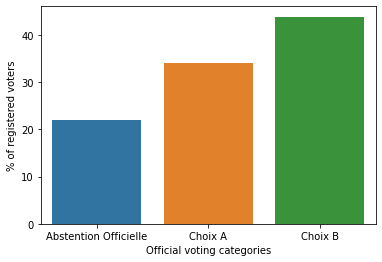

In [15]:
import seaborn as sns
x=["Abstention Officielle","Choix A","Choix B"]
y=[national[i] for i in x]
ax=sns.barplot(x=x,y=y)
ax.set(ylabel="% of registered voters",xlabel="Official voting categories")

### Conclusion #2 : as we expected, choice B won. 

Now let see how this is distributed wrt town size (here, I use nb. of registered voters as proxy)

In [16]:
results["Abstention Officielle"] = results["Abstentions"]+results["Blancs et nuls"]

for id in ["Abstention Officielle","Choix A","Choix B"]:
    results[f"Fraction {id}"] = 100*results[id]/results["Inscrits"]
    
results

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B,Abstention Officielle,Fraction Abstention Officielle,Fraction Choix A,Fraction Choix B
insee,,,,,,,,,,,,,
01001,01,AIN,001,L'Abergement-Clémenciat,592,84,9,154,345,93,15.709459,26.013514,58.277027
01002,01,AIN,002,L'Abergement-de-Varey,215,36,5,66,108,41,19.069767,30.697674,50.232558
01004,01,AIN,004,Ambérieu-en-Bugey,8205,1698,126,2717,3664,1824,22.230347,33.113955,44.655698
01005,01,AIN,005,Ambérieux-en-Dombes,1152,170,18,280,684,188,16.319444,24.305556,59.375000
01006,01,AIN,006,Ambléon,105,17,1,35,52,18,17.142857,33.333333,49.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,ZZ,FRANCAIS DE L'ETRANGER,007,Europe centrale,89643,54981,318,17055,17289,55299,61.688029,19.025468,19.286503
ZZ008,ZZ,FRANCAIS DE L'ETRANGER,008,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706,84758,77.219099,8.471889,14.309011
ZZ009,ZZ,FRANCAIS DE L'ETRANGER,009,Afrique Nord-Ouest,98997,59887,321,22116,16673,60208,60.818005,22.340071,16.841925


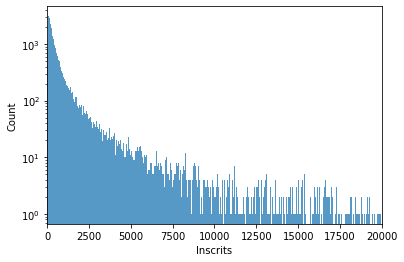

In [17]:
import matplotlib.pyplot as plt

ax=sns.histplot(data=results,x="Inscrits")
ax.set(xlim=(0,20000))
ax.set(yscale='log')
plt.show()

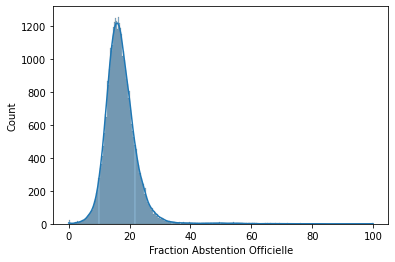

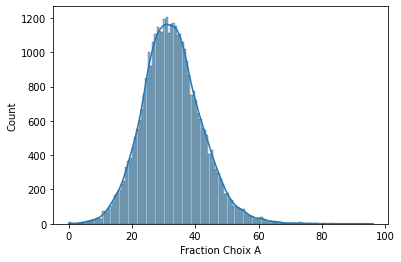

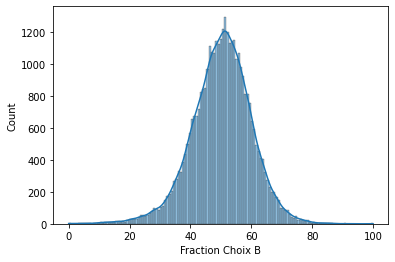

In [18]:
for id in ["Fraction Abstention Officielle","Fraction Choix A","Fraction Choix B"]:
    ax=sns.histplot(data=results,x=id,kde=True)
    plt.show()

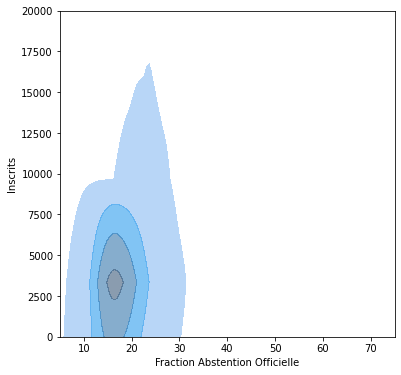

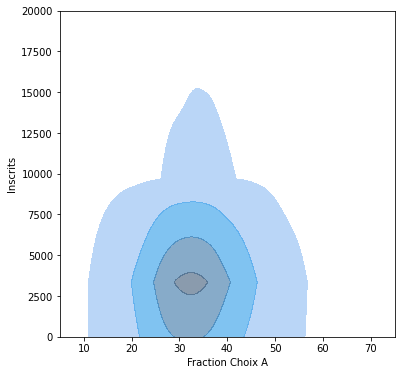

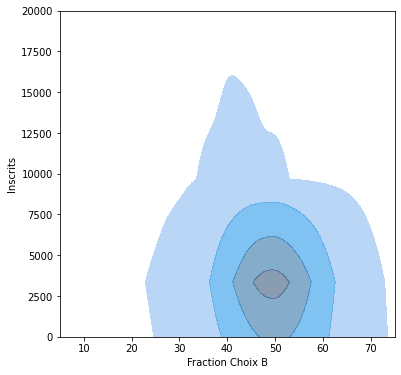

In [19]:
for id in ["Fraction Abstention Officielle","Fraction Choix A","Fraction Choix B"]:
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.kdeplot(
        data=results,
        x=id,
        y="Inscrits",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        ax=ax,
    )
    ax.set(ylim=(0,20000))
    ax.set(xlim=(5,75))
    plt.show()

# A few additional checks related to arrondissements & DomToms

In [20]:
results[results['Libellé de la commune'] == 'Marseille']

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,Blancs et nuls,Choix A,Choix B,Abstention Officielle,Fraction Abstention Officielle,Fraction Choix A,Fraction Choix B
insee,,,,,,,,,,,,,
13055,13,BOUCHES DU RHONE,055,Marseille,484206,105301,5201,168317,205387,110502,22.821279,34.761445,42.417277


In [21]:
results[results['Code du département'].str.contains('Z')]['Libellé du département'].unique()

array(['GUADELOUPE', 'MARTINIQUE', 'GUYANE', 'LA REUNION', 'MAYOTTE',
       'NOUVELLE CALEDONIE', 'POLYNESIE FRANCAISE',
       'SAINT PIERRE ET MIQUELON', 'WALLIS-ET-FUTUNA',
       'SAINT-MARTIN/SAINT-BARTHELEMY', "FRANCAIS DE L'ETRANGER"],
      dtype=object)

In [22]:
results[results['Code du département'].str.contains('Z')]['Code du département'].unique()

array(['ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'],
      dtype=object)

# Conclusions from this notebook :

* Combining a departement & city code will give an unique ID
* Choice B won the election (44% of registered voters)
* No obvious correlation wrt number of registered voters (~ town size)

After a brief look at the other datasets, the unique ID I mentionned is the INSEE codes : 5 digits, with first 2 = departement, last 3 = city code.